In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import PIL.Image as Image

In [54]:
def load_dataframe(path):
    df = pd.read_csv(path)
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

train_path = '/Users/jon/development/university/sis/cv_api/data/sign_mnist/sign_mnist_train.csv'
test_path = '/Users/jon/development/university/sis/cv_api/data/sign_mnist/sign_mnist_test.csv'

train_dataframe = load_dataframe(train_path)
test_dataframe = load_dataframe(test_path)


In [55]:
def form_datasets(labels, images):
    if len(labels) != len(images):
        raise Exception('The number of labels and images are not the same.')

    output_labels = []
    output_images = []

    for x in range(len(labels)):
        label = labels[x]
        image = images[x]
        image = image.reshape((28, 28))

        output_labels.append(label)
        output_images.append(image)

    return np.array(output_labels).astype(float), np.array(output_images).astype(float)


train_labels, train_images = form_datasets(train_dataframe['label'].to_numpy(), train_dataframe.drop('label', axis=1).to_numpy())
test_labels, test_images = form_datasets(test_dataframe['label'].to_numpy(), test_dataframe.drop('label', axis=1).to_numpy())

train_images = np.expand_dims(train_images, axis=3) # Expanding Dimension for Convolutional Layer
test_images = np.expand_dims(test_images, axis=3) # Expanding Dimension for Convolutional Layer

In [56]:
def getImageGenerators(training_labels, training_images, test_labels, test_images):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2,
        fill_mode='nearest'
    )

    test_datagen = ImageDataGenerator(
        rescale=1./255
    )

    train_generator = datagen.flow(x=training_images, y=training_labels, batch_size=32)
    test_generator = test_datagen.flow(x=test_images, y=test_labels, batch_size=32)

    return train_generator, test_generator

train_generator, test_generator = getImageGenerators(train_labels, train_images, test_labels, test_images)

In [57]:
def build_model():
    model = tf.keras.Sequential([
        # tf.keras.layers.Input(shape=(None, None, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_model()

epochs = 30
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

model.summary()

ValueError: Input 0 of layer "max_pooling2d_10" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 32, None, None, 32)

<Figure size 640x480 with 0 Axes>

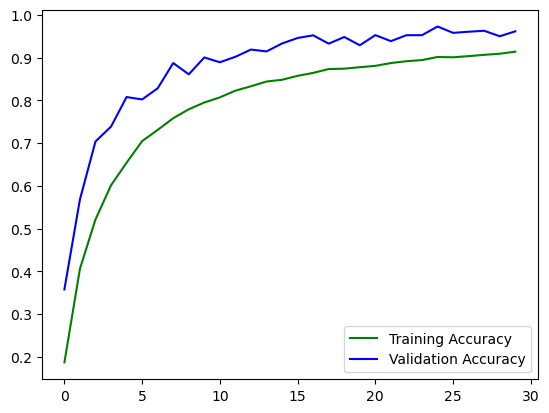

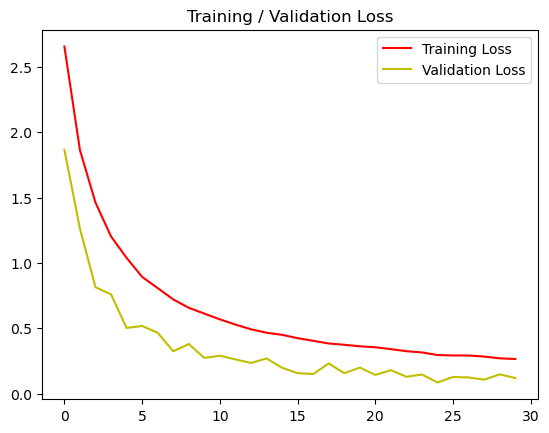

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.legend()
plt.figure()
plt.title('Training / Validation Accuracy')

plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'y', label='Validation Loss')
plt.title('Training / Validation Loss')
plt.legend()
plt.figure()

In [ ]:
!mkdir -p export_model
model.save('export_model/sign_language_model')

INFO:tensorflow:Assets written to: export_model/sign_language_model/assets


INFO:tensorflow:Assets written to: export_model/sign_language_model/assets
